## 📊 Telecom Customer Churn Analysis  
**Author:** Nikhilesh Bhattacharyya  

This project uses the **Telecom Churn Dataset**, which has information about **7,043 customers** from a telecom company. It includes **customer details**, **services they use**, and **how much they pay**.

The main goal is to **find out why some customers leave the company** (this is called **churn**). The project focuses on the **main reasons for churn**, especially for **non-senior customers** who have been with the company for a **long time**.

These insights will help the company create **better plans to keep customers**, improve their **service quality**, and **reduce churn** in the future.

---

### Key Features:
- `CustomerID` : Unique identifier for each customer  
- `Gender` : Customer gender (Male, Female)  
- `SeniorCitizen` : Indicates if the customer is a senior citizen (Yes or No)  
- `ServiceTenure` : Number of months the customer has been with the provider  
- `tenure_group` : Categorical version of tenure (e.g., 0–1 year, 5+ years)  
- `SubscriptionPlan` : Contract type (Month-to-month, One year, Two year)  
- `NetServiceType` : Internet service type (DSL, Fiber optic, No internet service)  
- `MonthlyCharges` : Monthly billing amount  
- `TotalCharges` : Total amount billed to the customer  
- `Churn` : Binary label indicating whether the customer churned (`Yes`) or stayed (`No`)  
- `calls_activity_level`, `sms_activity_level`, `overall_activity_level` : Derived features showing engagement based on calls and SMS usage  

---

### Objective:
To explore patterns and predictors of churn, evaluate customer behavior across different demographics and service categories, and provide actionable recommendations for **improving customer retention**.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as st
import warnings
warnings.filterwarnings("ignore")

In [451]:
# LOADING THE DATASHEET
df=pd.read_csv("Telecom_Churn.csv")
df.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,ServiceTenure,PhoneService,MultipleLines,NetServiceType,Cyber Security,...,StreamingMovies,SubscriptionPlan,E-Billing,PaymentMethod,MonthlyCharges,TotalCharges,Churn,state,calls_made,sms_sent
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Karnataka,44,45
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.5,No,Mizoram,62,39
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Arunachal Pradesh,49,24
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tamil Nadu,80,25
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tripura,78,15


# Inspection and Cleaning

In [453]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Gender             7043 non-null   object 
 2   Senior Citizen     7043 non-null   int64  
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   ServiceTenure      7043 non-null   int64  
 6   PhoneService       7043 non-null   object 
 7   MultipleLines      7043 non-null   object 
 8   NetServiceType     7043 non-null   object 
 9   Cyber Security     7043 non-null   object 
 10  Cloud Backup       7043 non-null   object 
 11  DeviceProtection   7043 non-null   object 
 12  Technical Support  7043 non-null   object 
 13  StreamingTV        7043 non-null   object 
 14  StreamingMovies    7043 non-null   object 
 15  SubscriptionPlan   7043 non-null   object 
 16  E-Billing          7043 

CustomerID           0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
ServiceTenure        0
PhoneService         0
MultipleLines        0
NetServiceType       0
Cyber Security       0
Cloud Backup         0
DeviceProtection     0
Technical Support    0
StreamingTV          0
StreamingMovies      0
SubscriptionPlan     0
E-Billing            0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
state                0
calls_made           0
sms_sent             0
dtype: int64

In [454]:
df["CustomerID"].isnull().sum()

0

In [455]:
df.duplicated().sum()

0

In [456]:
df[df["TotalCharges"]== " "].shape

(11, 24)

In [457]:
df["TotalCharges"].replace(" " , "0",inplace=True) #FILLING BLANKS WITH 0
df[df["TotalCharges"]== " "].shape

(0, 24)

In [458]:
df[df["calls_made"]< 0]["calls_made"].tolist()


[-1,
 -3,
 -5,
 -10,
 -3,
 -9,
 -1,
 -4,
 -4,
 -1,
 -6,
 -1,
 -5,
 -6,
 -2,
 -8,
 -1,
 -3,
 -1,
 -5,
 -1,
 -3,
 -6,
 -8,
 -3,
 -1,
 -7,
 -6,
 -2,
 -9,
 -4,
 -1,
 -2,
 -3,
 -3,
 -1,
 -2,
 -5,
 -7,
 -4,
 -6,
 -2,
 -5,
 -6,
 -1,
 -3,
 -2,
 -7,
 -4,
 -1,
 -3,
 -1,
 -9,
 -7,
 -2,
 -1,
 -3,
 -6,
 -1,
 -5,
 -5,
 -5,
 -1,
 -6,
 -1,
 -4,
 -6,
 -1,
 -7,
 -1,
 -4,
 -10,
 -3,
 -7,
 -3,
 -2,
 -5,
 -4,
 -3,
 -1,
 -5,
 -2,
 -5,
 -3,
 -6,
 -1,
 -4,
 -4,
 -5,
 -2,
 -1,
 -1,
 -7,
 -5,
 -6,
 -6,
 -5,
 -10,
 -6,
 -2,
 -2,
 -8,
 -7,
 -2,
 -3,
 -6,
 -3,
 -6,
 -2,
 -3,
 -7,
 -3,
 -3,
 -9,
 -2,
 -2,
 -6,
 -5,
 -2,
 -3,
 -5,
 -2,
 -1,
 -1,
 -2,
 -1,
 -6,
 -2,
 -3,
 -8,
 -6,
 -2,
 -5,
 -1,
 -3,
 -2,
 -5,
 -5,
 -2,
 -3,
 -7,
 -5,
 -2,
 -7,
 -9,
 -4,
 -1,
 -2,
 -7,
 -4,
 -3,
 -2,
 -4,
 -4,
 -5,
 -2,
 -7,
 -1,
 -2,
 -1,
 -4,
 -1,
 -8,
 -4,
 -3,
 -5,
 -1,
 -5,
 -3,
 -10,
 -1,
 -4,
 -2,
 -4,
 -2,
 -2,
 -6,
 -5,
 -9,
 -2,
 -1,
 -1,
 -3,
 -7,
 -7,
 -7,
 -4,
 -3,
 -7,
 -2,
 -4,
 -1,
 -7,
 -4,
 -4,
 -4,
 -10,
 -7,
 -2,


In [459]:
df[df["sms_sent"]< 0]["sms_sent"].tolist()

[-1,
 -2,
 -1,
 -3,
 -4,
 -1,
 -2,
 -1,
 -1,
 -1,
 -4,
 -4,
 -3,
 -2,
 -2,
 -4,
 -2,
 -2,
 -2,
 -2,
 -2,
 -1,
 -3,
 -3,
 -2,
 -3,
 -1,
 -3,
 -3,
 -3,
 -1,
 -2,
 -4,
 -2,
 -2,
 -2,
 -3,
 -5,
 -1,
 -1,
 -3,
 -5,
 -1,
 -3,
 -1,
 -4,
 -3,
 -5,
 -3,
 -1,
 -1,
 -4,
 -1,
 -1,
 -2,
 -4,
 -5,
 -2,
 -2,
 -2,
 -3,
 -2,
 -2,
 -2,
 -4,
 -2,
 -2,
 -3,
 -3,
 -1,
 -1,
 -1,
 -5,
 -1,
 -5,
 -1,
 -1,
 -3,
 -4,
 -1,
 -1,
 -1,
 -3,
 -2,
 -4,
 -1,
 -2,
 -1,
 -3,
 -1,
 -2,
 -3,
 -4,
 -1,
 -5,
 -1,
 -5,
 -1,
 -3,
 -1,
 -3,
 -1,
 -3,
 -3,
 -4,
 -2,
 -2,
 -2,
 -2,
 -3,
 -1,
 -4,
 -3,
 -2,
 -1,
 -3,
 -3,
 -1,
 -4,
 -2,
 -1,
 -1,
 -1,
 -3,
 -2,
 -1,
 -4,
 -3,
 -3,
 -1,
 -3,
 -1,
 -1,
 -5,
 -2,
 -1,
 -1,
 -3,
 -3,
 -2,
 -3,
 -1,
 -3,
 -1,
 -2,
 -3,
 -5,
 -1,
 -4,
 -2,
 -3,
 -5,
 -2,
 -4,
 -3,
 -1,
 -1,
 -2,
 -1,
 -1,
 -1,
 -4,
 -2,
 -3,
 -4,
 -3,
 -1,
 -1,
 -5,
 -2,
 -3,
 -3,
 -5,
 -3,
 -3,
 -2,
 -2,
 -2,
 -3,
 -2,
 -3,
 -3,
 -2,
 -1,
 -2,
 -1,
 -3,
 -3,
 -4,
 -1,
 -3,
 -2,
 -1,
 -4,
 -2,
 -1,
 -1,
 -5,
 -2,
 -2,


In [460]:
def sub_remove(x):
    if x < 0:
        return abs(x)
    else:
        return x

df["calls_made"]=df["calls_made"].apply(sub_remove)
df["sms_sent"]=df["sms_sent"].apply(sub_remove)



df.head()
      

,CustomerID,Gender,Senior Citizen,Partner,Dependents,ServiceTenure,PhoneService,MultipleLines,NetServiceType,Cyber Security,...,StreamingMovies,SubscriptionPlan,E-Billing,PaymentMethod,MonthlyCharges,TotalCharges,Churn,state,calls_made,sms_sent
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Karnataka,44,45
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.5,No,Mizoram,62,39
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Arunachal Pradesh,49,24
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tamil Nadu,80,25
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tripura,78,15


In [461]:
df.columns

Index(['CustomerID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'ServiceTenure', 'PhoneService', 'MultipleLines', 'NetServiceType',
       'Cyber Security', 'Cloud Backup', 'DeviceProtection',
       'Technical Support', 'StreamingTV', 'StreamingMovies',
       'SubscriptionPlan', 'E-Billing', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'state', 'calls_made', 'sms_sent'],
      dtype='object')

In [462]:
df.rename(columns={"Technical Support\t": "Technical Support"}, inplace=True)
df.columns = df.columns.str.strip()


In [463]:
def con(x):
    if x == 0:
        return "No"
    else:
        return "Yes"

df["Senior Citizen"] = df["Senior Citizen"].apply(con)

In [464]:
def call(x):
    if x >= 90:
        return "High"
    elif x >= 50:
        return "Moderate"
    elif x >= 15:
        return "Normal"
    else:
        return "Easy"

def sms(x):
    if x >= 50:
        return "High"
    elif x >= 37:
        return "Moderate"
    elif x >= 12:
        return "Normal"
    else:
        return "Easy"


        
df["calls_activity_level"]=df["calls_made"].apply(call)  
df["sms_activity_level"]=df["sms_sent"].apply(sms)


converting raw call and SMS counts into activity levels like High, Moderate, Normal, and Easy to simplify behavior analysis.

In [466]:
df.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,ServiceTenure,PhoneService,MultipleLines,NetServiceType,Cyber Security,...,E-Billing,PaymentMethod,MonthlyCharges,TotalCharges,Churn,state,calls_made,sms_sent,calls_activity_level,sms_activity_level
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,Yes,Electronic check,29.85,29.85,No,Karnataka,44,45,Normal,Moderate
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,Mailed check,56.95,1889.5,No,Mizoram,62,39,Moderate,Moderate
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,Yes,Mailed check,53.85,108.15,Yes,Arunachal Pradesh,49,24,Normal,Normal
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,No,Bank transfer (automatic),42.30,1840.75,No,Tamil Nadu,80,25,Moderate,Normal
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,Yes,Electronic check,70.70,151.65,Yes,Tripura,78,15,Moderate,Normal


In [467]:
def get_overall_activity(call, sms):
    if call == "High" and sms == "High":
        return "High"
    elif "High" in [call, sms]:
        return "Moderate"
    elif call == "Moderate" and sms == "Moderate":
        return "Normal"
    elif "Moderate" in [call, sms] and "Normal" in [call, sms]:
        return "Normal"
    else:
        return "Low"

# Apply function to create overall_activity_level
df["overall_activity_level"] = df.apply(lambda row: get_overall_activity(row["calls_activity_level"], row["sms_activity_level"]), axis=1)

We’re combining call and SMS activity levels to assign an overall activity score—ranging from Low to High—based on the user’s total engagement.

In [469]:
df.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,ServiceTenure,PhoneService,MultipleLines,NetServiceType,Cyber Security,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,state,calls_made,sms_sent,calls_activity_level,sms_activity_level,overall_activity_level
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,Electronic check,29.85,29.85,No,Karnataka,44,45,Normal,Moderate,Normal
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Mailed check,56.95,1889.5,No,Mizoram,62,39,Moderate,Moderate,Normal
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,Mailed check,53.85,108.15,Yes,Arunachal Pradesh,49,24,Normal,Normal,Low
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Bank transfer (automatic),42.30,1840.75,No,Tamil Nadu,80,25,Moderate,Normal,Normal
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,Electronic check,70.70,151.65,Yes,Tripura,78,15,Moderate,Normal,Normal


In [470]:
df["MultipleLines"] = df["MultipleLines"].apply(lambda x: "No" if x == "No phone service" else x)
df["Cyber Security"]=df["Cyber Security"].apply(lambda x: "No" if x== "No internet service" else x)
cols = ["Cloud Backup", "DeviceProtection", "Technical Support", "StreamingMovies"]

for col in cols:
    df[col] = df[col].apply(lambda x: "No" if x == "No internet service" else x)


In [471]:
df.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,ServiceTenure,PhoneService,MultipleLines,NetServiceType,Cyber Security,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,state,calls_made,sms_sent,calls_activity_level,sms_activity_level,overall_activity_level
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,Electronic check,29.85,29.85,No,Karnataka,44,45,Normal,Moderate,Normal
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Mailed check,56.95,1889.5,No,Mizoram,62,39,Moderate,Moderate,Normal
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,Mailed check,53.85,108.15,Yes,Arunachal Pradesh,49,24,Normal,Normal,Low
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Bank transfer (automatic),42.30,1840.75,No,Tamil Nadu,80,25,Moderate,Normal,Normal
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,Electronic check,70.70,151.65,Yes,Tripura,78,15,Moderate,Normal,Normal


In [472]:
def group_tenure(x):
    if x <= 12:
        return '0–1 year'
    elif x <= 24:
        return '1–2 years'
    elif x <= 36:
        return '2–3 years'
    elif x <= 48:
        return '3–4 years'
    elif x <= 60:
        return '4–5 years'
    else:
        return '5+ years'

df['tenure_group'] = df['ServiceTenure'].apply(group_tenure)
df.head()


,CustomerID,Gender,Senior Citizen,Partner,Dependents,ServiceTenure,PhoneService,MultipleLines,NetServiceType,Cyber Security,...,MonthlyCharges,TotalCharges,Churn,state,calls_made,sms_sent,calls_activity_level,sms_activity_level,overall_activity_level,tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,29.85,29.85,No,Karnataka,44,45,Normal,Moderate,Normal,0–1 year
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,56.95,1889.5,No,Mizoram,62,39,Moderate,Moderate,Normal,2–3 years
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,53.85,108.15,Yes,Arunachal Pradesh,49,24,Normal,Normal,Low,0–1 year
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,42.30,1840.75,No,Tamil Nadu,80,25,Moderate,Normal,Normal,3–4 years
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,70.70,151.65,Yes,Tripura,78,15,Moderate,Normal,Normal,0–1 year


In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              7043 non-null   object 
 1   Gender                  7043 non-null   object 
 2   Senior Citizen          7043 non-null   object 
 3   Partner                 7043 non-null   object 
 4   Dependents              7043 non-null   object 
 5   ServiceTenure           7043 non-null   int64  
 6   PhoneService            7043 non-null   object 
 7   MultipleLines           7043 non-null   object 
 8   NetServiceType          7043 non-null   object 
 9   Cyber Security          7043 non-null   object 
 10  Cloud Backup            7043 non-null   object 
 11  DeviceProtection        7043 non-null   object 
 12  Technical Support       7043 non-null   object 
 13  StreamingTV             7043 non-null   object 
 14  StreamingMovies         7043 non-null   

# CLEANING COMPLETED


# Exploratory Data Analysis (EDA) Begins

In [476]:
df.describe(include=object)

,CustomerID,Gender,Senior Citizen,Partner,Dependents,PhoneService,MultipleLines,NetServiceType,Cyber Security,Cloud Backup,...,SubscriptionPlan,E-Billing,PaymentMethod,TotalCharges,Churn,state,calls_activity_level,sms_activity_level,overall_activity_level,tenure_group
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,2,3,2,2,...,3,2,4,6531,2,28,4,4,4,6
top,7590-VHVEG,Male,No,No,No,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,0,No,Arunachal Pradesh,Moderate,Normal,Low,0–1 year
freq,1,3555,5901,3641,4933,6361,4072,3096,5024,4614,...,3875,4171,2365,11,5174,276,2815,3526,3635,2186


**I. Gender Distribution:**

* There are **3,555 Males** and **3,488 Females** in the data.
* The number of males and females is **almost the same**.

**Conclusion:**
Since the numbers are close, we may **not see big differences in churn by gender** unless specific patterns emerge.

---

**II. Partner and Dependents:**

* More customers **do not have a partner** (3,641) than those who do (3,402).
* More customers **do not have dependents** (4,933) than those who do (2,110).

**Conclusion:**
Most customers are single and have no dependents. This may lead to **higher churn** as they may feel less tied to the service.

---

**III. PhoneService:**

* **Yes (6,361)** is much more than No (682).

**Conclusion:**
Most customers use phone service, so churn analysis should **focus on phone-related features** like MultipleLines.

---

**IV. MultipleLines:**

* **No (4,072)** is more common than Yes (2,971).

**Conclusion:**
Fewer customers have multiple lines, indicating simple phone plans. Customers with basic plans may **experience higher churn**.

---

**V. NetServiceType:**

* **Fiber optic (3,096)** is the most common, followed by DSL and No internet service.

**Conclusion:**
Fiber optic is popular but usually more expensive, which may cause **higher churn**. 


---

**VI. Billing and Payment - SubscriptionPlan:**

* Month-to-month (3,875) is most common, followed by One year and Two year plans.

**Conclusion:**
Short-term contracts dominate, often leading to **higher churn** due to less commitment. Long-term plans show lower churn.


---

**VII. PaymentMethod:**

* Electronic check (2,365) is the most common, followed by mailed check, bank transfer, and credit card.

**Conclusion:**
Customers paying by electronic check **may have higher churn**, but **hypothesis testing is required** to confirm.

---

**VIII. Churn:**

* No (5,174) is far more common than Yes (1,869).
* The churn rate is approximately **26.5%**.

---

**IX. Call and SMS Activity Levels:**

* Moderate call activity (2,815) and Normal SMS activity (3,526) are most common.

**Conclusion:**
Customers generally use calls and SMS at moderate or low levels.

---

**X. tenure_group:**

* 0–1 year (2,186) is the most frequent, followed by other groups.

**Conclusion:**
Many customers are new (0–1 year), which correlates with **higher churn**. Long-term customers (5+ years) tend to stay longer.

---




In [584]:
df.describe()

,ServiceTenure,MonthlyCharges,TotalCharges,calls_made,sms_sent
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,49.007525,24.165838
std,24.559481,30.090047,2266.794470,28.957565,14.555071
min,0.000000,18.250000,0.000000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,24.000000,12.000000
50%,29.000000,70.350000,1394.550000,49.000000,24.000000
75%,55.000000,89.850000,3786.600000,74.000000,37.000000
max,72.000000,118.750000,8684.800000,108.000000,53.000000


Churn Rate by Tenure Group and Senior Citizen Status:
 Churn                              No       Yes
tenure_group Senior Citizen                    
0–1 year     No              0.560557  0.439443
             Yes             0.321875  0.678125
1–2 years    No              0.753505  0.246495
             Yes             0.505952  0.494048
2–3 years    No              0.827893  0.172107
             Yes             0.594937  0.405063
3–4 years    No              0.854460  0.145540
             Yes             0.577236  0.422764
4–5 years    No              0.877372  0.122628
             Yes             0.755102  0.244898
5+ years     No              0.941575  0.058425
             Yes             0.893805  0.106195


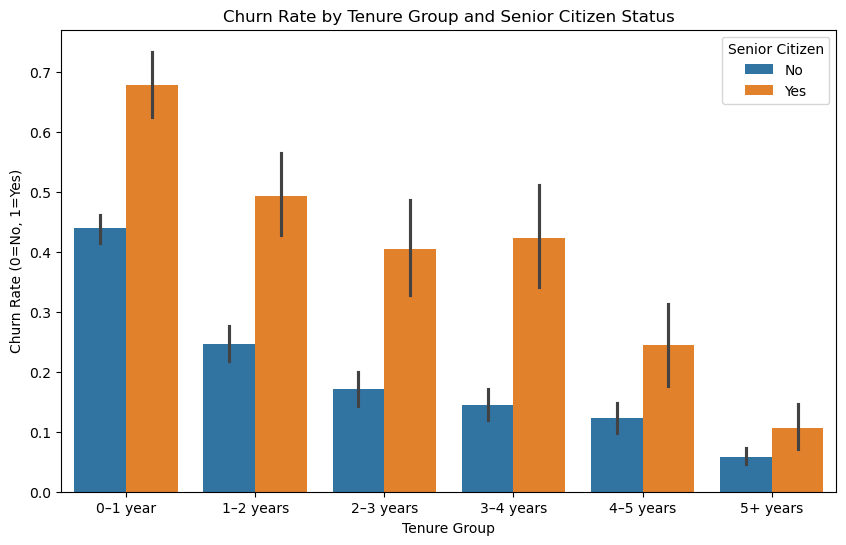

In [537]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure tenure_group is ordered
tenure_order = ['0–1 year', '1–2 years', '2–3 years', '3–4 years', '4–5 years', '5+ years']
df['tenure_group'] = pd.Categorical(df['tenure_group'], categories=tenure_order, ordered=True)

# Calculate churn rate for each tenure_group and Senior Citizen status
churn_rate = df.groupby(['tenure_group', 'Senior Citizen'])['Churn'].value_counts(normalize=True).unstack().fillna(0)

print("Churn Rate by Tenure Group and Senior Citizen Status:\n", churn_rate)

# Plot stacked bar plot with hue=Senior Citizen
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='tenure_group', hue='Senior Citizen', y=df['Churn'].map({'No':0, 'Yes':1}))
plt.title('Churn Rate by Tenure Group and Senior Citizen Status')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate (0=No, 1=Yes)')
plt.show()


**Conclusion:**  
The graph shows that **churn rates are highest for customers with 0–1 year tenure**, particularly **senior citizens (67.8% churn)** compared to **non-seniors (43.9%)**.  
Churn **decreases significantly with longer tenure**, especially for non-seniors (**5.8% for 5+ years**).  

This suggests that **new customers, especially seniors, are at high risk of leaving**, likely due to lack of loyalty or dissatisfaction.  

The company should prioritize **onboarding support and retention incentives for new customers** to reduce early churn.


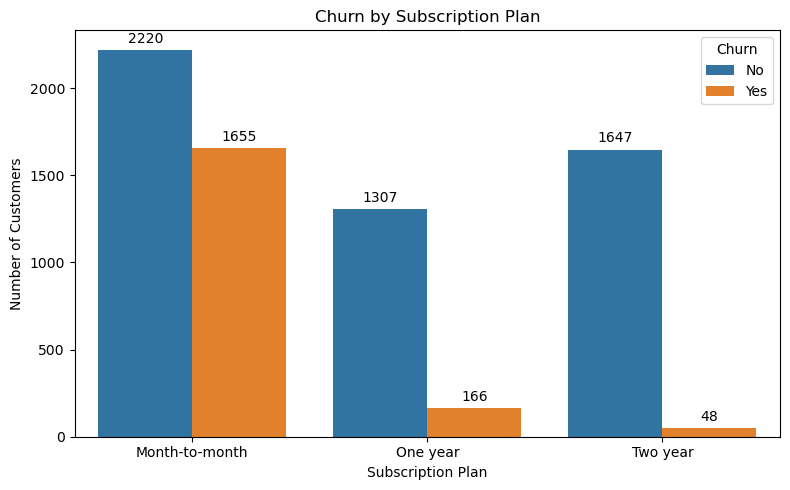

In [478]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='SubscriptionPlan', hue='Churn')

# Add values above bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

plt.title('Churn by Subscription Plan')
plt.xlabel('Subscription Plan')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


**Conclusion:**  
Month-to-month plans have the **highest churn** (significant Yes counts), while **two-year plans show the lowest churn**.  

This indicates that customers with **shorter contracts are less committed and more likely to leave**.  

Longer contracts foster loyalty, likely due to **lower costs or stronger engagement**.  

The company should **incentivize month-to-month customers to switch to one- or two-year plans** through discounts or added benefits.


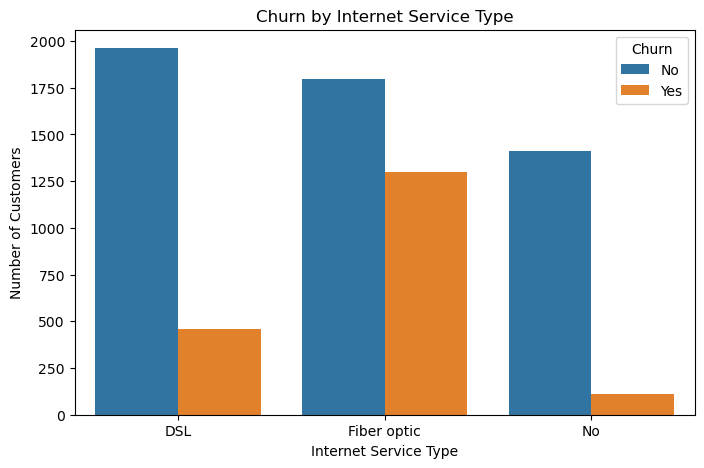

In [479]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='NetServiceType', hue='Churn')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.show()

**Conclusion:**  
Fiber optic customers exhibit higher churn compared to DSL and no internet service users.  
This may be due to higher costs or service quality issues with Fiber optic plans.  
The company should investigate customer satisfaction with Fiber optic services and consider targeted retention strategies, such as improved support or pricing adjustments, to reduce churn.


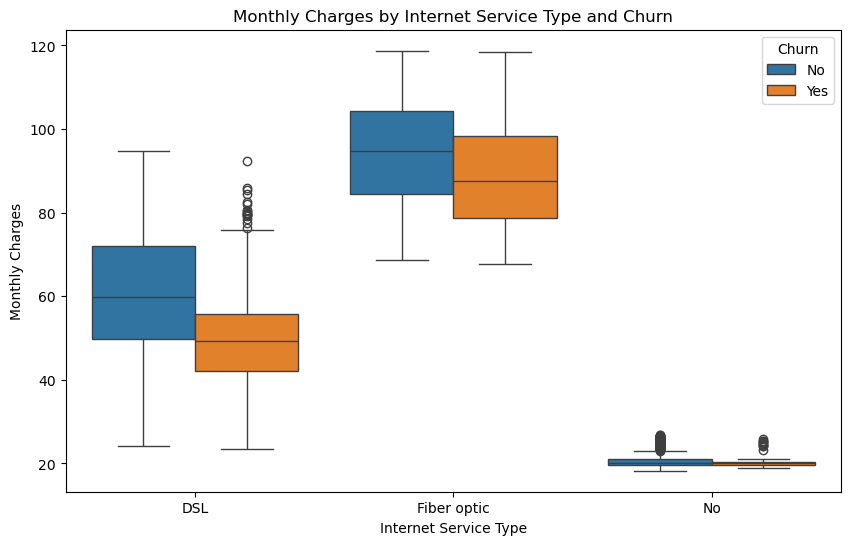

In [480]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='NetServiceType', y='MonthlyCharges', hue='Churn')
plt.title('Monthly Charges by Internet Service Type and Churn')
plt.xlabel('Internet Service Type')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn')
plt.show()

**Conclusion:**  
Fiber optic customers who churn have higher median monthly charges (~$90) compared to DSL (~$50) or no internet service.  
This suggests that cost is a significant driver of churn for Fiber optic users.  
The company should explore cost-reduction strategies, such as bundling services or offering discounts, to retain high-paying Fiber optic customers.


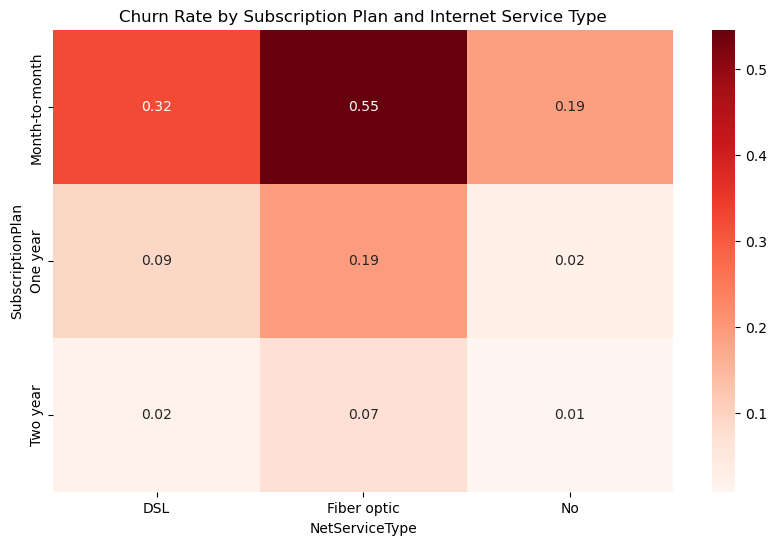

In [481]:
churn_combo = df.groupby(['SubscriptionPlan', 'NetServiceType'])['Churn'].value_counts(normalize=True).unstack().fillna(0)
heatmap_data = churn_combo['Yes'].unstack()

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='Reds', fmt='.2f')
plt.title('Churn Rate by Subscription Plan and Internet Service Type')
plt.xlabel('NetServiceType')
plt.ylabel('SubscriptionPlan')
plt.show()


**Conclusion:**  
The highest churn rate (**55%**) occurs for **month-to-month Fiber optic customers**, while **two-year DSL or no internet service customers** have the lowest churn (**2%**).  
This highlights the combined impact of **short-term contracts** and **expensive services** on churn.  
The company should target **month-to-month Fiber optic users** with **loyalty programs** or **long-term contract incentives** to reduce churn.


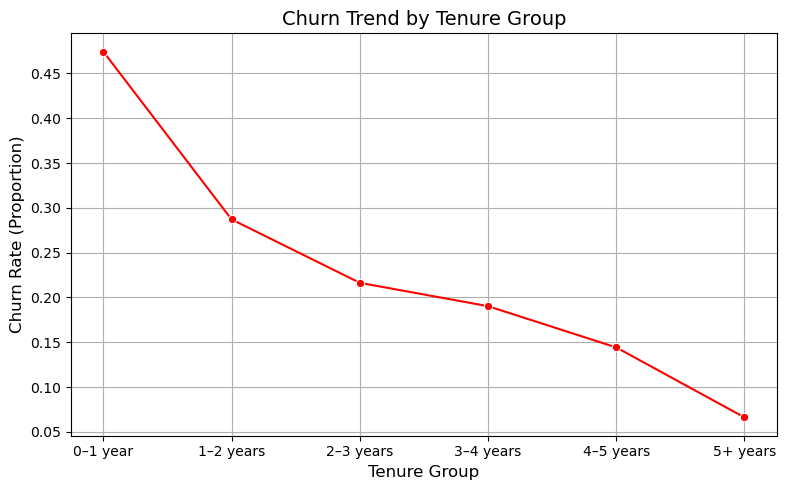

In [482]:
order = ['0–1 year', '1–2 years', '2–3 years', '3–4 years', '4–5 years', '5+ years']
df['tenure_group'] = pd.Categorical(df['tenure_group'], categories=order, ordered=True)


churn_rate = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()

plot_data = churn_rate['Yes'].reset_index()
plot_data.columns = ['tenure_group', 'churn_rate']

# Step 4: Plot using seaborn
plt.figure(figsize=(8,5))
sns.lineplot(data=plot_data, x='tenure_group', y='churn_rate', marker='o', color='red')
plt.title('Churn Trend by Tenure Group', fontsize=14)
plt.xlabel('Tenure Group', fontsize=12)
plt.ylabel('Churn Rate (Proportion)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


**Conclusion:**  
Churn rates decline steadily from ***46%*** for **0–1** year customers** to **~7%** for **5+ year customers**, indicating that **longer tenure fosters customer loyalty**.  
**New customers** are at high risk of leaving, possibly due to **onboarding challenges** or **dissatisfaction**.  
The company should **enhance onboarding experiences** and offer **early retention incentives** to reduce churn among new customers.


In [483]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Clean columns
df['Senior Citizen'] = df['Senior Citizen'].str.strip().str.capitalize()
df['Churn'] = df['Churn'].str.strip().str.capitalize()

# Debug: Check unique values
print("Senior Citizen unique:", df['Senior Citizen'].unique())
print("Churn unique:", df['Churn'].unique())

# Check if non-seniors exist
non_seniors = df[df['Senior Citizen'] == 'No']
print("Number of non-seniors:", len(non_seniors))
if len(non_seniors) == 0:
    print("Warning: No non-senior customers found. Check 'Senior Citizen' column.")
else:
    print("Non-seniors sample:\n", non_seniors[['Senior Citizen', 'Churn', 'Gender']].head())
    print("Non-seniors churn unique:", non_seniors['Churn'].unique())

Senior Citizen unique: ['No' 'Yes']
Churn unique: ['No' 'Yes']
Number of non-seniors: 5901
Non-seniors sample:
   Senior Citizen Churn  Gender
0             No    No  Female
1             No    No    Male
2             No   Yes    Male
3             No    No    Male
4             No   Yes  Female
Non-seniors churn unique: ['No' 'Yes']


In [484]:
print(df['Churn'].unique())


['No' 'Yes']


TotalCharges type after conversion: float64
TotalCharges null values: 0

Senior Citizen unique: ['No' 'Yes']
Senior Citizen value counts:
 Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64
Churn unique: ['No' 'Yes']

Number of long-tenure non-seniors: 1181

Columns in data_to_use (Non-Seniors, 5+ Years):
 ['CustomerID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'ServiceTenure', 'PhoneService', 'MultipleLines', 'NetServiceType', 'Cyber Security', 'Cloud Backup', 'DeviceProtection', 'Technical Support', 'StreamingTV', 'StreamingMovies', 'SubscriptionPlan', 'E-Billing', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'state', 'calls_made', 'sms_sent', 'calls_activity_level', 'sms_activity_level', 'overall_activity_level', 'tenure_group']
Data types in data_to_use (Non-Seniors, 5+ Years):
 ServiceTenure       int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

Sample of  (Non-Seniors, 5+ Years):
     CustomerID  Gender Senior Citiz

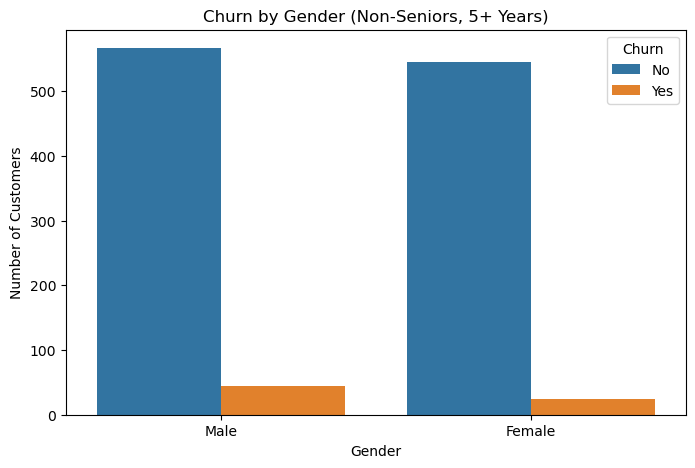


Churn counts by Gender (Non-Seniors, 5+ Years):
    Gender  Churn_No  Churn_Yes
0  Female       545         25
1    Male       567         44

Churn Rate by Gender (Non-Seniors, 5+ Years):
    Gender  Churn_Rate
0  Female    0.043860
1    Male    0.072013

Chi-Square Test for Gender and Churn (Non-Seniors, 5+ Years): p-value = 0.0527


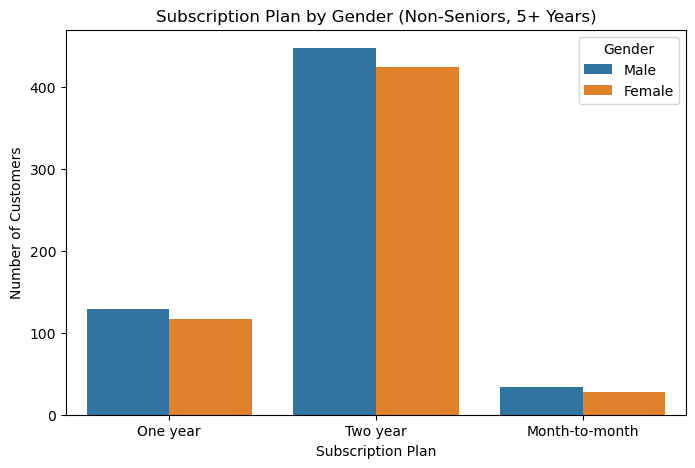


Churn Rate by SubscriptionPlan and Gender (Non-Seniors, 5+ Years):
 Churn SubscriptionPlan  Gender  Churn_Rate
0       Month-to-month  Female    0.250000
1       Month-to-month    Male    0.205882
2             One year  Female    0.085470
3             One year    Male    0.155039
4             Two year  Female    0.018824
5             Two year    Male    0.037946


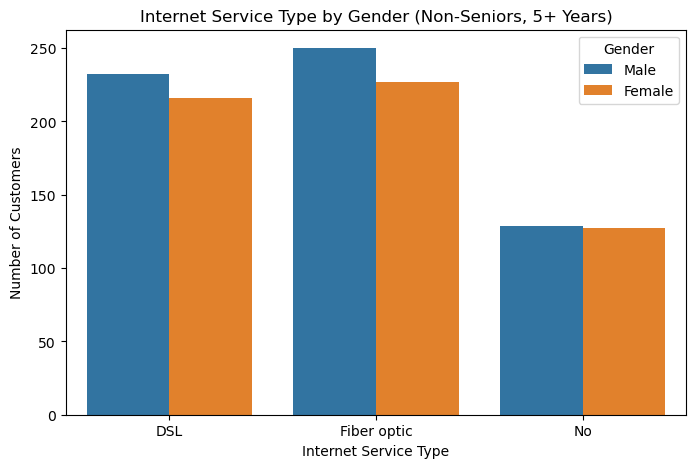


Churn Rate by NetServiceType and Gender (Non-Seniors, 5+ Years):
 Churn NetServiceType  Gender  Churn_Rate
0                DSL  Female    0.013889
1                DSL    Male    0.025862
2        Fiber optic  Female    0.092511
3        Fiber optic    Male    0.152000
4                 No  Female    0.007874
5                 No    Male    0.000000


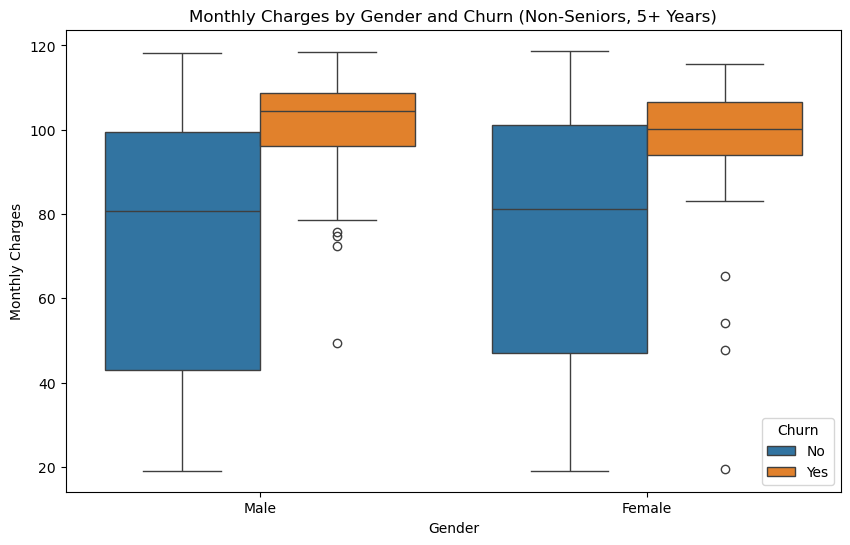


Summary stats (Non-Seniors, 5+ Years):
   Statistic  ServiceTenure  MonthlyCharges  TotalCharges
0     count    1181.000000     1181.000000   1181.000000
1      mean      68.098222       73.840432   5036.521634
2       std       3.641638       32.316898   2241.726307
3       min      61.000000       19.100000   1123.650000
4       25%      65.000000       49.850000   3321.350000
5       50%      69.000000       82.500000   5617.950000
6       75%      72.000000      102.400000   6841.300000
7       max      72.000000      118.750000   8684.800000


In [541]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("TotalCharges type after conversion:", df['TotalCharges'].dtype)
print("TotalCharges null values:", df['TotalCharges'].isnull().sum())

# Verify Senior Citizen column
print("\nSenior Citizen unique:", df['Senior Citizen'].unique())
print("Senior Citizen value counts:\n", df['Senior Citizen'].value_counts())

# Ensure Churn is clean
df['Churn'] = df['Churn'].str.strip().str.capitalize()
print("Churn unique:", df['Churn'].unique())

# Ensure tenure_group is ordered
tenure_order = ['0–1 year', '1–2 years', '2–3 years', '3–4 years', '4–5 years', '5+ years']
df['tenure_group'] = pd.Categorical(df['tenure_group'], categories=tenure_order, ordered=True)

# Filter male and female non-seniors with long tenure (5+ years)
long_tenure_non_seniors = df[(df['Senior Citizen'] == 'No') & (df['tenure_group'] == '5+ years') & (df['Gender'].isin(['Male', 'Female']))]
print(f"\nNumber of long-tenure non-seniors: {len(long_tenure_non_seniors)}")

if len(long_tenure_non_seniors) == 0:
    print("Warning: No long-tenure non-seniors found. Falling back to all customers with 5+ years.")
    data_to_use = df[df['tenure_group'] == '5+ years']
    title_suffix = ' (All Customers, 5+ Years)'
else:
    data_to_use = long_tenure_non_seniors
    title_suffix = ' (Non-Seniors, 5+ Years)'

# Debug: Check columns and data types
print(f"\nColumns in data_to_use{title_suffix}:\n", data_to_use.columns.tolist())
print(f"Data types in data_to_use{title_suffix}:\n", data_to_use[['ServiceTenure', 'MonthlyCharges', 'TotalCharges']].dtypes)

# Sample of filtered data
print(f"\nSample of {title_suffix}:\n", data_to_use[['CustomerID', 'Gender', 'Senior Citizen', 'ServiceTenure', 'tenure_group', 'Churn', 'SubscriptionPlan', 'NetServiceType']].head())

# Gender distribution as DataFrame
gender_dist = data_to_use['Gender'].value_counts().reset_index()
gender_dist.columns = ['Gender', 'Count']
print(f"\nGender distribution{title_suffix}:\n", gender_dist)

# 1. Churn by Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=data_to_use, x='Gender', hue='Churn')
plt.title(f'Churn by Gender{title_suffix}')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.savefig('churn_by_gender_long_tenure.png')
plt.show()

# Churn counts as DataFrame
churn_counts = data_to_use.groupby(['Gender', 'Churn']).size().unstack(fill_value=0).reset_index()
churn_counts.columns = ['Gender', 'Churn_No', 'Churn_Yes']
print(f"\nChurn counts by Gender{title_suffix}:\n", churn_counts)

# Churn rate as DataFrame
churn_rate = churn_counts[['Gender']].copy()
churn_rate['Churn_Rate'] = churn_counts['Churn_Yes'] / (churn_counts['Churn_Yes'] + churn_counts['Churn_No'])
print(f"\nChurn Rate by Gender{title_suffix}:\n", churn_rate)

# Chi-square test for Gender and Churn
contingency_table = pd.crosstab(data_to_use['Gender'], data_to_use['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-Square Test for Gender and Churn{title_suffix}: p-value = {p:.4f}")

# 2. SubscriptionPlan
plt.figure(figsize=(8, 5))
sns.countplot(data=data_to_use, x='SubscriptionPlan', hue='Gender')
plt.title(f'Subscription Plan by Gender{title_suffix}')
plt.xlabel('Subscription Plan')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.savefig('subscription_plan_long_tenure.png')
plt.show()

# Churn rate by SubscriptionPlan and Gender as DataFrame
churn_rate_sp = data_to_use.groupby(['SubscriptionPlan', 'Gender'])['Churn'].value_counts(normalize=True).unstack().fillna(0).reset_index()
churn_rate_sp = churn_rate_sp[['SubscriptionPlan', 'Gender', 'Yes']].rename(columns={'Yes': 'Churn_Rate'})
print(f"\nChurn Rate by SubscriptionPlan and Gender{title_suffix}:\n", churn_rate_sp)

# 3. NetServiceType
plt.figure(figsize=(8, 5))
sns.countplot(data=data_to_use, x='NetServiceType', hue='Gender')
plt.title(f'Internet Service Type by Gender{title_suffix}')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.savefig('netservicetype_long_tenure.png')
plt.show()

# Churn rate by NetServiceType and Gender as DataFrame
churn_rate_ns = data_to_use.groupby(['NetServiceType', 'Gender'])['Churn'].value_counts(normalize=True).unstack().fillna(0).reset_index()
churn_rate_ns = churn_rate_ns[['NetServiceType', 'Gender', 'Yes']].rename(columns={'Yes': 'Churn_Rate'})
print(f"\nChurn Rate by NetServiceType and Gender{title_suffix}:\n", churn_rate_ns)

# 4. MonthlyCharges distribution by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_use, x='Gender', y='MonthlyCharges', hue='Churn')
plt.title(f'Monthly Charges by Gender and Churn{title_suffix}')
plt.xlabel('Gender')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn')
plt.savefig('monthly_charges_long_tenure.png')
plt.show()

# Summary stats as DataFrame
numeric_cols = [col for col in ['ServiceTenure', 'MonthlyCharges', 'TotalCharges'] if col in data_to_use.columns]
if numeric_cols:
    summary_stats = data_to_use[numeric_cols].describe().reset_index()
    summary_stats.columns = ['Statistic'] + numeric_cols
    print(f"\nSummary stats{title_suffix}:\n", summary_stats)
else:
    print(f"\nNo numeric columns available for summary stats{title_suffix}.")

# Export key DataFrames to CSV for portfolio
churn_rate.to_csv('churn_rate_gender_long_tenure.csv', index=False)
churn_rate_sp.to_csv('churn_rate_subscription_plan_long_tenure.csv', index=False)
churn_rate_ns.to_csv('churn_rate_netservicetype_long_tenure.csv', index=False)
if numeric_cols:
    summary_stats.to_csv('summary_stats_long_tenure.csv', index=False)

Churn Rate by Payment Method (Non-Seniors):
 PaymentMethod
Bank transfer (automatic)    0.156369
Credit card (automatic)      0.130669
Electronic check             0.425748
Mailed check                 0.173913
dtype: float64


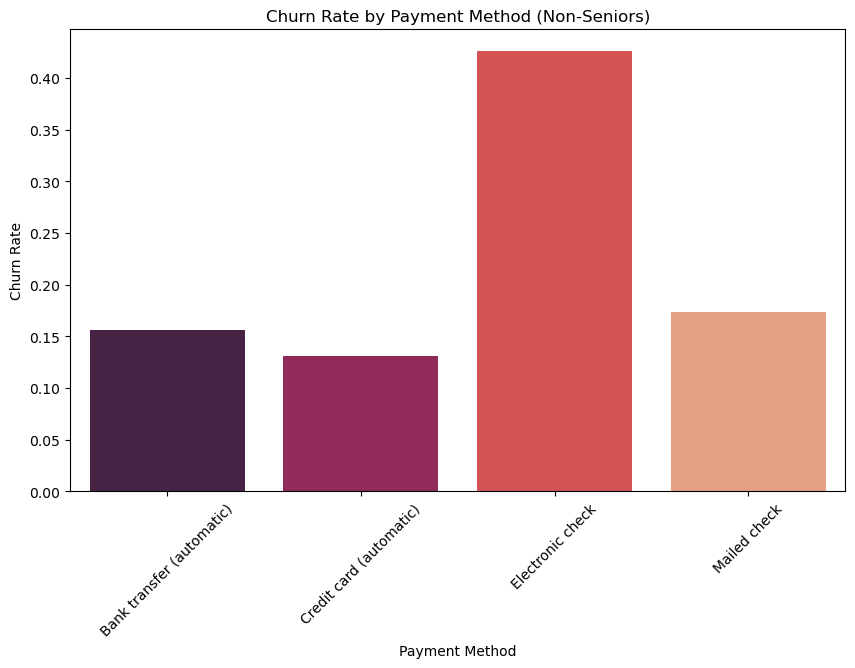

In [544]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter non-seniors
non_seniors = df[df['Senior Citizen'] == 'No']

# Calculate churn rate by Payment Method for non-seniors
churn_counts = non_seniors.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)
churn_rate = churn_counts['Yes'] / (churn_counts['Yes'] + churn_counts['No'])

print("Churn Rate by Payment Method (Non-Seniors):\n", churn_rate)

# Plot churn rate by Payment Method
plt.figure(figsize=(10,6))
sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='rocket')
plt.title('Churn Rate by Payment Method (Non-Seniors)')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


**Conclusion:**  
Electronic check users have the **highest churn rate (42.6%)** among non-seniors, followed by mailed check (**17.4%**), while automatic payment methods (bank transfer, credit card) show **lower churn (~13–15%)**.  
This suggests **manual payment processes may frustrate customers**, leading to higher churn.  
The company should **encourage automatic payments** through incentives or **streamline electronic check processes**.


In [553]:
# Step 1: Filter for Non-senior customers
non_senior_df = df[df['Senior Citizen'] == 'No']

# Step 2: Filter for 'High' and 'Moderate' overall activity
filtered_df = non_senior_df[non_senior_df['overall_activity_level'].isin(['Normal', 'Moderate'])]

# Step 3: Group by Gender and overall_activity_level, then count
grouped = filtered_df.groupby(['Gender', 'overall_activity_level']).size().unstack(fill_value=0)

# Step 4: Rename columns if needed
grouped = grouped.rename(columns={'Normal': 'Normal', 'Moderate': 'moderate'})

# Final Output
print(grouped)


overall_activity_level  moderate  Normal
Gender                                  
Female                       325    1092
Male                         320    1124


**Conclusion:**  
Among non-seniors, **Normal activity dominates** (1092 females, 1124 males) compared to Moderate (325 females, 320 males), with **similar gender distributions**.  
This indicates **balanced engagement across genders** for Normal and Moderate activity levels.  
The company can use this to design **uniform engagement strategies** without gender-specific targeting.


<Figure size 800x500 with 0 Axes>

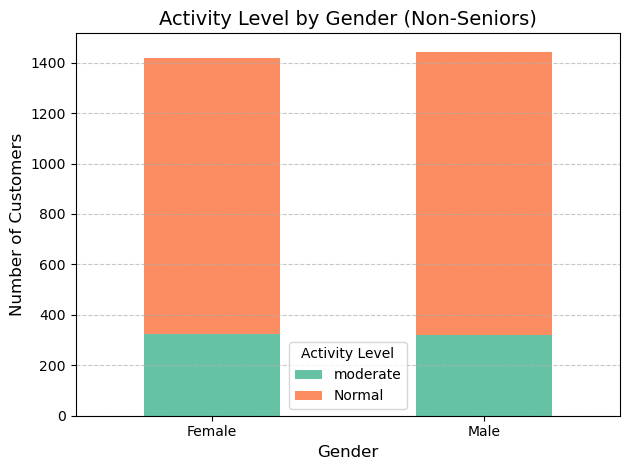

In [555]:

plt.figure(figsize=(8, 5))
grouped.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'])

plt.title('Activity Level by Gender (Non-Seniors)', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Activity Level')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Conclusion:**  
The stacked bar plot confirms that **Normal activity levels are more common than Moderate** for both genders among non-seniors, with **no significant gender disparity** (1092 vs. 1124 for Normal, 325 vs. 320 for Moderate).  
This suggests **consistent communication patterns across genders**.  
The company should focus on **maintaining engagement for Normal activity users** to prevent potential churn.


<Figure size 1000x600 with 0 Axes>

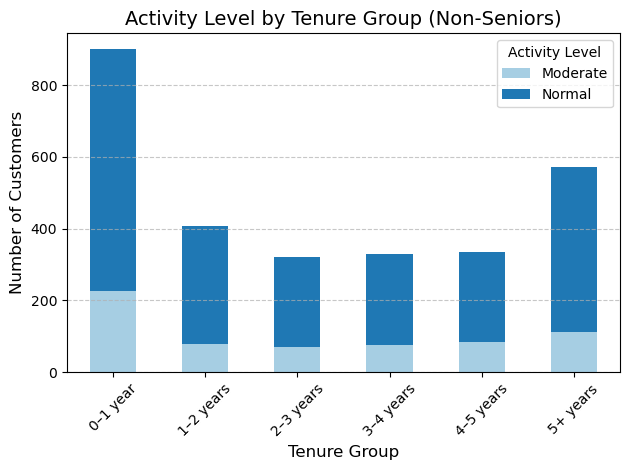

In [557]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter for Non-senior customers
non_senior_df = df[df['Senior Citizen'] == 'No']

# Step 2: Filter for 'Normal' and 'Moderate' activity
filtered_df = non_senior_df[non_senior_df['overall_activity_level'].isin(['Normal', 'Moderate'])]

# Step 3: Group by tenure_group and overall_activity_level
activity_tenure_group = filtered_df.groupby(['tenure_group', 'overall_activity_level']).size().unstack(fill_value=0)

# Step 4: Plot
plt.figure(figsize=(10, 6))
activity_tenure_group.plot(kind='bar', stacked=True, color=['#a6cee3', '#1f78b4'])

plt.title('Activity Level by Tenure Group (Non-Seniors)', fontsize=14)
plt.xlabel('Tenure Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Activity Level')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Conclusion:**  
Normal activity is **more prevalent across all tenure groups**, but **Moderate activity increases slightly with longer tenure** (e.g., 5+ years).  
This suggests that **longer-tenure customers are more engaged**, potentially contributing to their **lower churn rates**.  
The company should encourage **early engagement to boost Moderate activity among new customers**, fostering loyalty.


In [562]:
# Step 1: Filter for Non-senior customers
non_senior_df = df[df['Senior Citizen'] == 'No']

# Step 2: Filter only 'Moderate' and 'Normal' values
filtered_df = non_senior_df[
    (non_senior_df['calls_activity_level'].isin(['Moderate', 'Normal'])) |
    (non_senior_df['sms_activity_level'].isin(['Moderate', 'Normal']))
]

# Step 3: Group by Gender and count Moderate/Normal per column
result = filtered_df.groupby('Gender').agg({
    'calls_activity_level': lambda x: (x.isin(['Moderate', 'Normal'])).sum(),
    'sms_activity_level': lambda x: (x.isin(['Moderate', 'Normal'])).sum()
})

# Step 4: Rename columns for clarity
result.columns = ['(calls)_Moderate+Normal', '(sms)_Moderate+Normal']

# Show result
print(result)



        (calls)_Moderate+Normal  (sms)_Moderate+Normal
Gender                                                
Female                     2195                   2132
Male                       2249                   2206


**Conclusion:**  
Non-senior females have **2195 Moderate+Normal calls** and **2132 SMS**, while males have **2249 calls** and **2206 SMS**, showing **similar engagement levels**.  
This balance suggests **no gender-specific differences** in communication behavior.  
The company can apply **uniform strategies** to maintain or increase call and SMS activity across genders.

---

### Verification with Chi-Square Test

In [565]:
import pandas as pd

# Updated observed data
data = {
    'Calls_MN': [2249,2195],
    'SMS_MN': [2206, 2132]
}
index = ['Male', 'Female']
observed = pd.DataFrame(data, index=index)

# Row and column totals
observed['RowTotal'] = observed.sum(axis=1)
observed.loc['ColTotal'] = observed.sum()

# Grand total
grand_total = observed.loc['ColTotal', 'RowTotal']

# Calculate expected values
expected = pd.DataFrame(index=index, columns=['Calls_MN', 'SMS_MN'], dtype=float)
for row in index:
    for col in ['Calls_MN', 'SMS_MN']:
        expected.loc[row, col] = (
            observed.loc[row, 'RowTotal'] * observed.loc['ColTotal', col] / grand_total
        )

# Chi-square calculation
chi_square = (((observed.loc[index, ['Calls_MN', 'SMS_MN']] - expected) ** 2) / expected).sum().sum()

# Print results
print("Chi-square value:", chi_square)
print("Rounded Chi-square value:", round(chi_square, 4))


Chi-square value: 0.05287546975572524
Rounded Chi-square value: 0.0529


df=(rows−1)×(columns−1)=(2−1)×(2−1)=1
assumes alpha = 5% 
0.0529< 3.841.

**Conclusion:**  
The Chi-square test (**p = 0.0529**) shows **no statistically significant difference** in Moderate+Normal call and SMS activity between genders among non-seniors.  
This confirms that communication patterns are **similar for males and females**.  
The company can focus on **universal engagement strategies** rather than gender-specific ones.


In [570]:
#AVG TESTING

# Filter dataframe for Non-senior citizens
non_senior_df = df[df['Senior Citizen'] == 'No']

# Group by Gender and sum calls_made and sms_sent
total_activity = non_senior_df.groupby('Gender')[['calls_made', 'sms_sent']].sum()

# Count number of Non-senior users per gender
user_counts = non_senior_df['Gender'].value_counts()

# Calculate average calls and sms per user (divide sums by counts)
avg_activity = total_activity.div(user_counts, axis=0)

print(round(avg_activity,2))

        calls_made  sms_sent
Gender                      
Female       49.11     24.21
Male         48.92     24.36


Conclusion:
Among non-senior users, the average number of calls made and SMS sent per user is very similar between genders:

Females make about 49.11 calls and send 24.21 SMS on average.

Males make about 48.92 calls and send 24.36 SMS on average.

This shows no significant difference in calling and SMS activity between male and female non-senior users. Both genders have almost the same communication activity level.

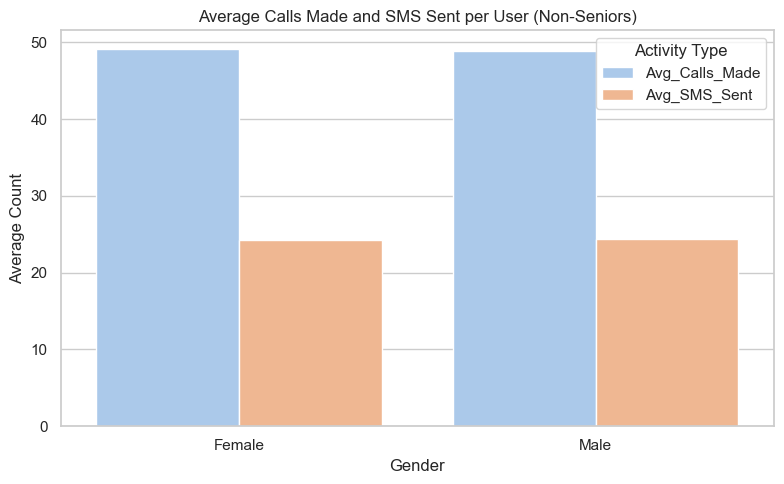

In [575]:
# Updated average activity data
data = {
    'Gender': ['Female', 'Male'],
    'Avg_Calls_Made': [49.11, 48.92],
    'Avg_SMS_Sent': [24.21, 24.36]
}

# Convert to DataFrame and melt it for Seaborn
df_plot = pd.DataFrame(data)
df_melted = df_plot.melt(id_vars='Gender', var_name='Activity_Type', value_name='Average_Count')

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_melted, x='Gender', y='Average_Count', hue='Activity_Type', palette='pastel')

plt.title('Average Calls Made and SMS Sent per User (Non-Seniors)')
plt.ylabel('Average Count')
plt.xlabel('Gender')
plt.legend(title='Activity Type')
plt.tight_layout()
plt.show()


**Conclusion:**  
The bar plot visually confirms that non-senior females and males have nearly equal average calls (~**49**) and SMS (~**24**), reinforcing the **lack of gender-based differences** in engagement.  
This suggests that communication services are **equally utilized across genders**.  
The company should maintain this balance and explore ways to **increase overall activity levels**.


In [580]:
# Step 1: Filter only non-senior
df_filtered = df[df['Senior Citizen'] == 'No']

# Step 2: Filter overall_activity_level for only 'High' and 'Moderate'
df_filtered = df_filtered[df_filtered['overall_activity_level'].isin(['Normal', 'Moderate'])]

# Step 3: Group by 'state' and 'Gender', count how many in each
result = df_filtered.groupby(['state', 'Gender']).size().reset_index(name='count')

# Step 4: Pivot the table to see Male-Female side by side
pivot_table = result.pivot(index='state', columns='Gender', values='count').astype(int)

print(pivot_table)


Gender             Female  Male
state                          
Andhra Pradesh         46    49
Arunachal Pradesh      54    59
Assam                  51    58
Bihar                  34    58
Chhattisgarh           58    47
Goa                    41    49
Gujarat                57    60
Haryana                52    47
Himachal Pradesh       59    48
Jharkhand              52    57
Karnataka              48    44
Kerala                 45    57
Madhya Pradesh         55    49
Maharashtra            46    46
Manipur                54    44
Meghalaya              62    56
Mizoram                51    63
Nagaland               44    35
Odisha                 49    57
Punjab                 46    47
Rajasthan              47    45
Sikkim                 66    50
Tamil Nadu             51    57
Telangana              55    46
Tripura                51    54
Uttar Pradesh          48    53
Uttarakhand            53    59
West Bengal            42    50


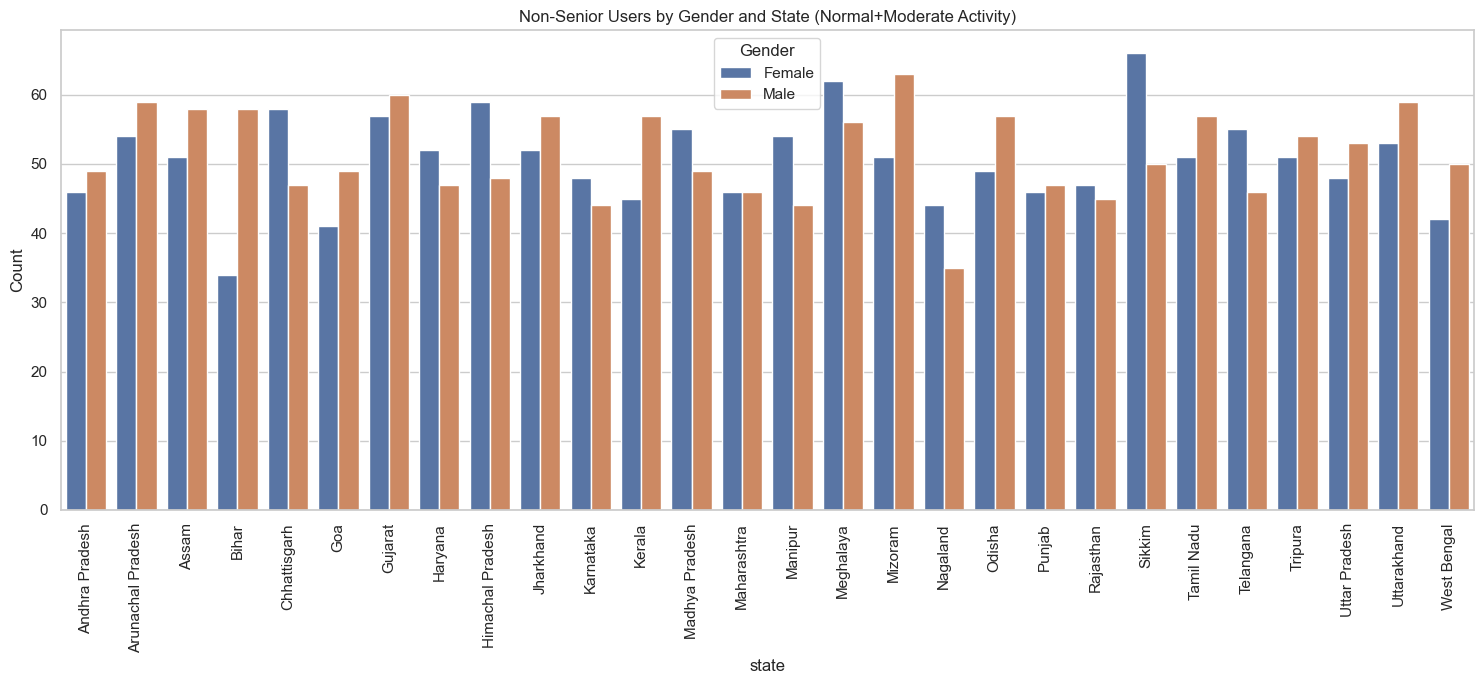

In [582]:
# Reset index for seaborn plot
plot_data = pivot_table.reset_index()

# Melt data for seaborn plotting
plot_data_melted = plot_data.melt(id_vars='state', value_vars=['Female', 'Male'], 
                                 var_name='Gender', value_name='Count')

plt.figure(figsize=(15,7))
sns.barplot(data=plot_data_melted, x='state', y='Count', hue='Gender')
plt.xticks(rotation=90)
plt.title("Non-Senior Users by Gender and State (Normal+Moderate Activity)")
plt.tight_layout()
plt.show()


**Conclusion:**  
The bar chart shows that for non-senior users, the number of **men and women with Normal+Moderate activity is mostly even** across different states.  
There are small differences, like in **Sikkim** where there are more **women (66)** than men (50), and in **Mizoram** where there are more **men (63)** than women (51).  

This means that **communication patterns are similar for men and women** in most places.  

The company can use this to make **general marketing plans for everyone**, but also create **special campaigns** for states with more active women or men, like in Sikkim.


# THE END

In [629]:
df.to_csv("Telecom Customer Churn Analysis.csv",index=False)